In [ ]:
!pip install gdown --quiet
!pip install gradio --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.2 MB/s eta 0:00:00


In [21]:
import gdown
url_heart = 'https://drive.google.com/uc?id=1U_a8_09jtkS12ClsyoPVhZYqmMJPCLgs'
url_lung = 'https://drive.google.com/uc?id=1fC8ZQrrfXUPyuW6dR4992SzVAROcEjQf'
gdown.download(url_heart, 'heart_disease_data.csv', quiet=False)
gdown.download(url_lung, 'lung_cancer_data.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1U_a8_09jtkS12ClsyoPVhZYqmMJPCLgs
To: /content/heart_disease_data.csv
100%|██████████| 38.1k/38.1k [00:00<00:00, 9.34MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fC8ZQrrfXUPyuW6dR4992SzVAROcEjQf
To: /content/lung_cancer_data.csv
100%|██████████| 61.5k/61.5k [00:00<00:00, 30.5MB/s]


'lung_cancer_data.csv'

In [22]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics

import gradio as gr
import plotly.express as px

In [23]:
df_lung_cancer = pd.read_csv('/content/lung_cancer_data.csv')

In [24]:
df_lung_cancer.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


### Data Preprocessing


In [25]:
columns_to_drop = ['index', 'Patient Id']
# up for debate: 'chronic Lung Disease', 'Genetic Risk', 'Air Pollution'
df_lung_cancer.drop(columns_to_drop, axis=1, inplace=True)

In [26]:
level_list = df_lung_cancer['Level'].tolist()

level_dict = {'Low' : 1, 'Medium' : 2, 'High' : 3}

for i in range(0, len(level_list)):
  level_list[i] = level_dict[level_list[i]]

df_lung_cancer['Level'] = level_list

# Models

# Plots

### Occupational Hazards vs Genetic Risk

Linear regression is a method to model the relationship between variables via a line of best fit. A positive correlation shows both variables increasing while a negative correlation shows one variable increasing while the other decreases.

Below is a scatter plot which shows the relationship between “Occupational Hazards” and “Genetic Risk,” which are both measured numerically from 1-8, with 1 being the lowest level. “Occupational Hazards” include jobs with high Asbestos, a mineral fiber that occurs in rock and soil, exposure like construction workers or automobile painters. On the other hand, “Genetic Risk” refers to the larger risk, of about 2-3 times more likely, of having lung cancer if a family member has/had it. These two risk factors positively correlate to one another; therefore, people who do have a risky occupation and have a family history of lung cancer should find ways to increase their lung safety on the job or find a new one.

[0.28738054] [0.88923162]


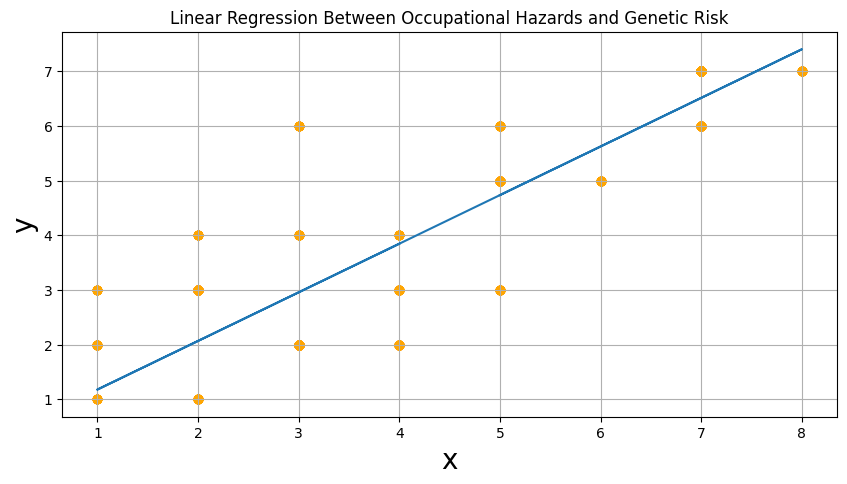

In [27]:
length = len(df_lung_cancer.index)

X_m = df_lung_cancer["OccuPational Hazards"].to_numpy().reshape(-1, 1)
Y_m = df_lung_cancer["Genetic Risk"].to_numpy().reshape(-1, 1)

idx = np.arange(length)
np.random.shuffle(idx)

split_threshold = int(length * 0.8)

train_idx = idx[:split_threshold]
test_idx = idx[split_threshold:]

x_train, y_train = X_m[train_idx], Y_m[train_idx]
x_test, y_test = X_m[test_idx], Y_m[test_idx]


from sklearn.linear_model import LinearRegression

linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

y_hat = linr.predict(X_m)

plt.figure(figsize=(10,5))
plt.plot(X_m, y_hat, '-')

plt.scatter(X_m, Y_m, c='orange')
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.title('Linear Regression Between Occupational Hazards and Genetic Risk')
plt.grid('on')
plt.show()

### Alchohol Use vs Obesity

This is a scatter plot that depicts how alcohol use and obesity are related to the level of lung cancer in a person. Alcohol usage and obesity have levels from 1-8 and 1-7 respectively. Lung cancer levels range from 1-3. As alcohol usage and obesity increase, lung cancer levels increase as well.


In [28]:
import plotly.express as px
px.scatter(df_lung_cancer, x='Obesity', y='Alcohol use', color='Level')

### Correlation Matrix
To start our project, we created a Correlation table heatmap showing how different factors were associated with lung cancer. We were surprised that chronic lung disease had a very high correlation to occupational hazards. We also saw that weight loss had a very high negative correlation.


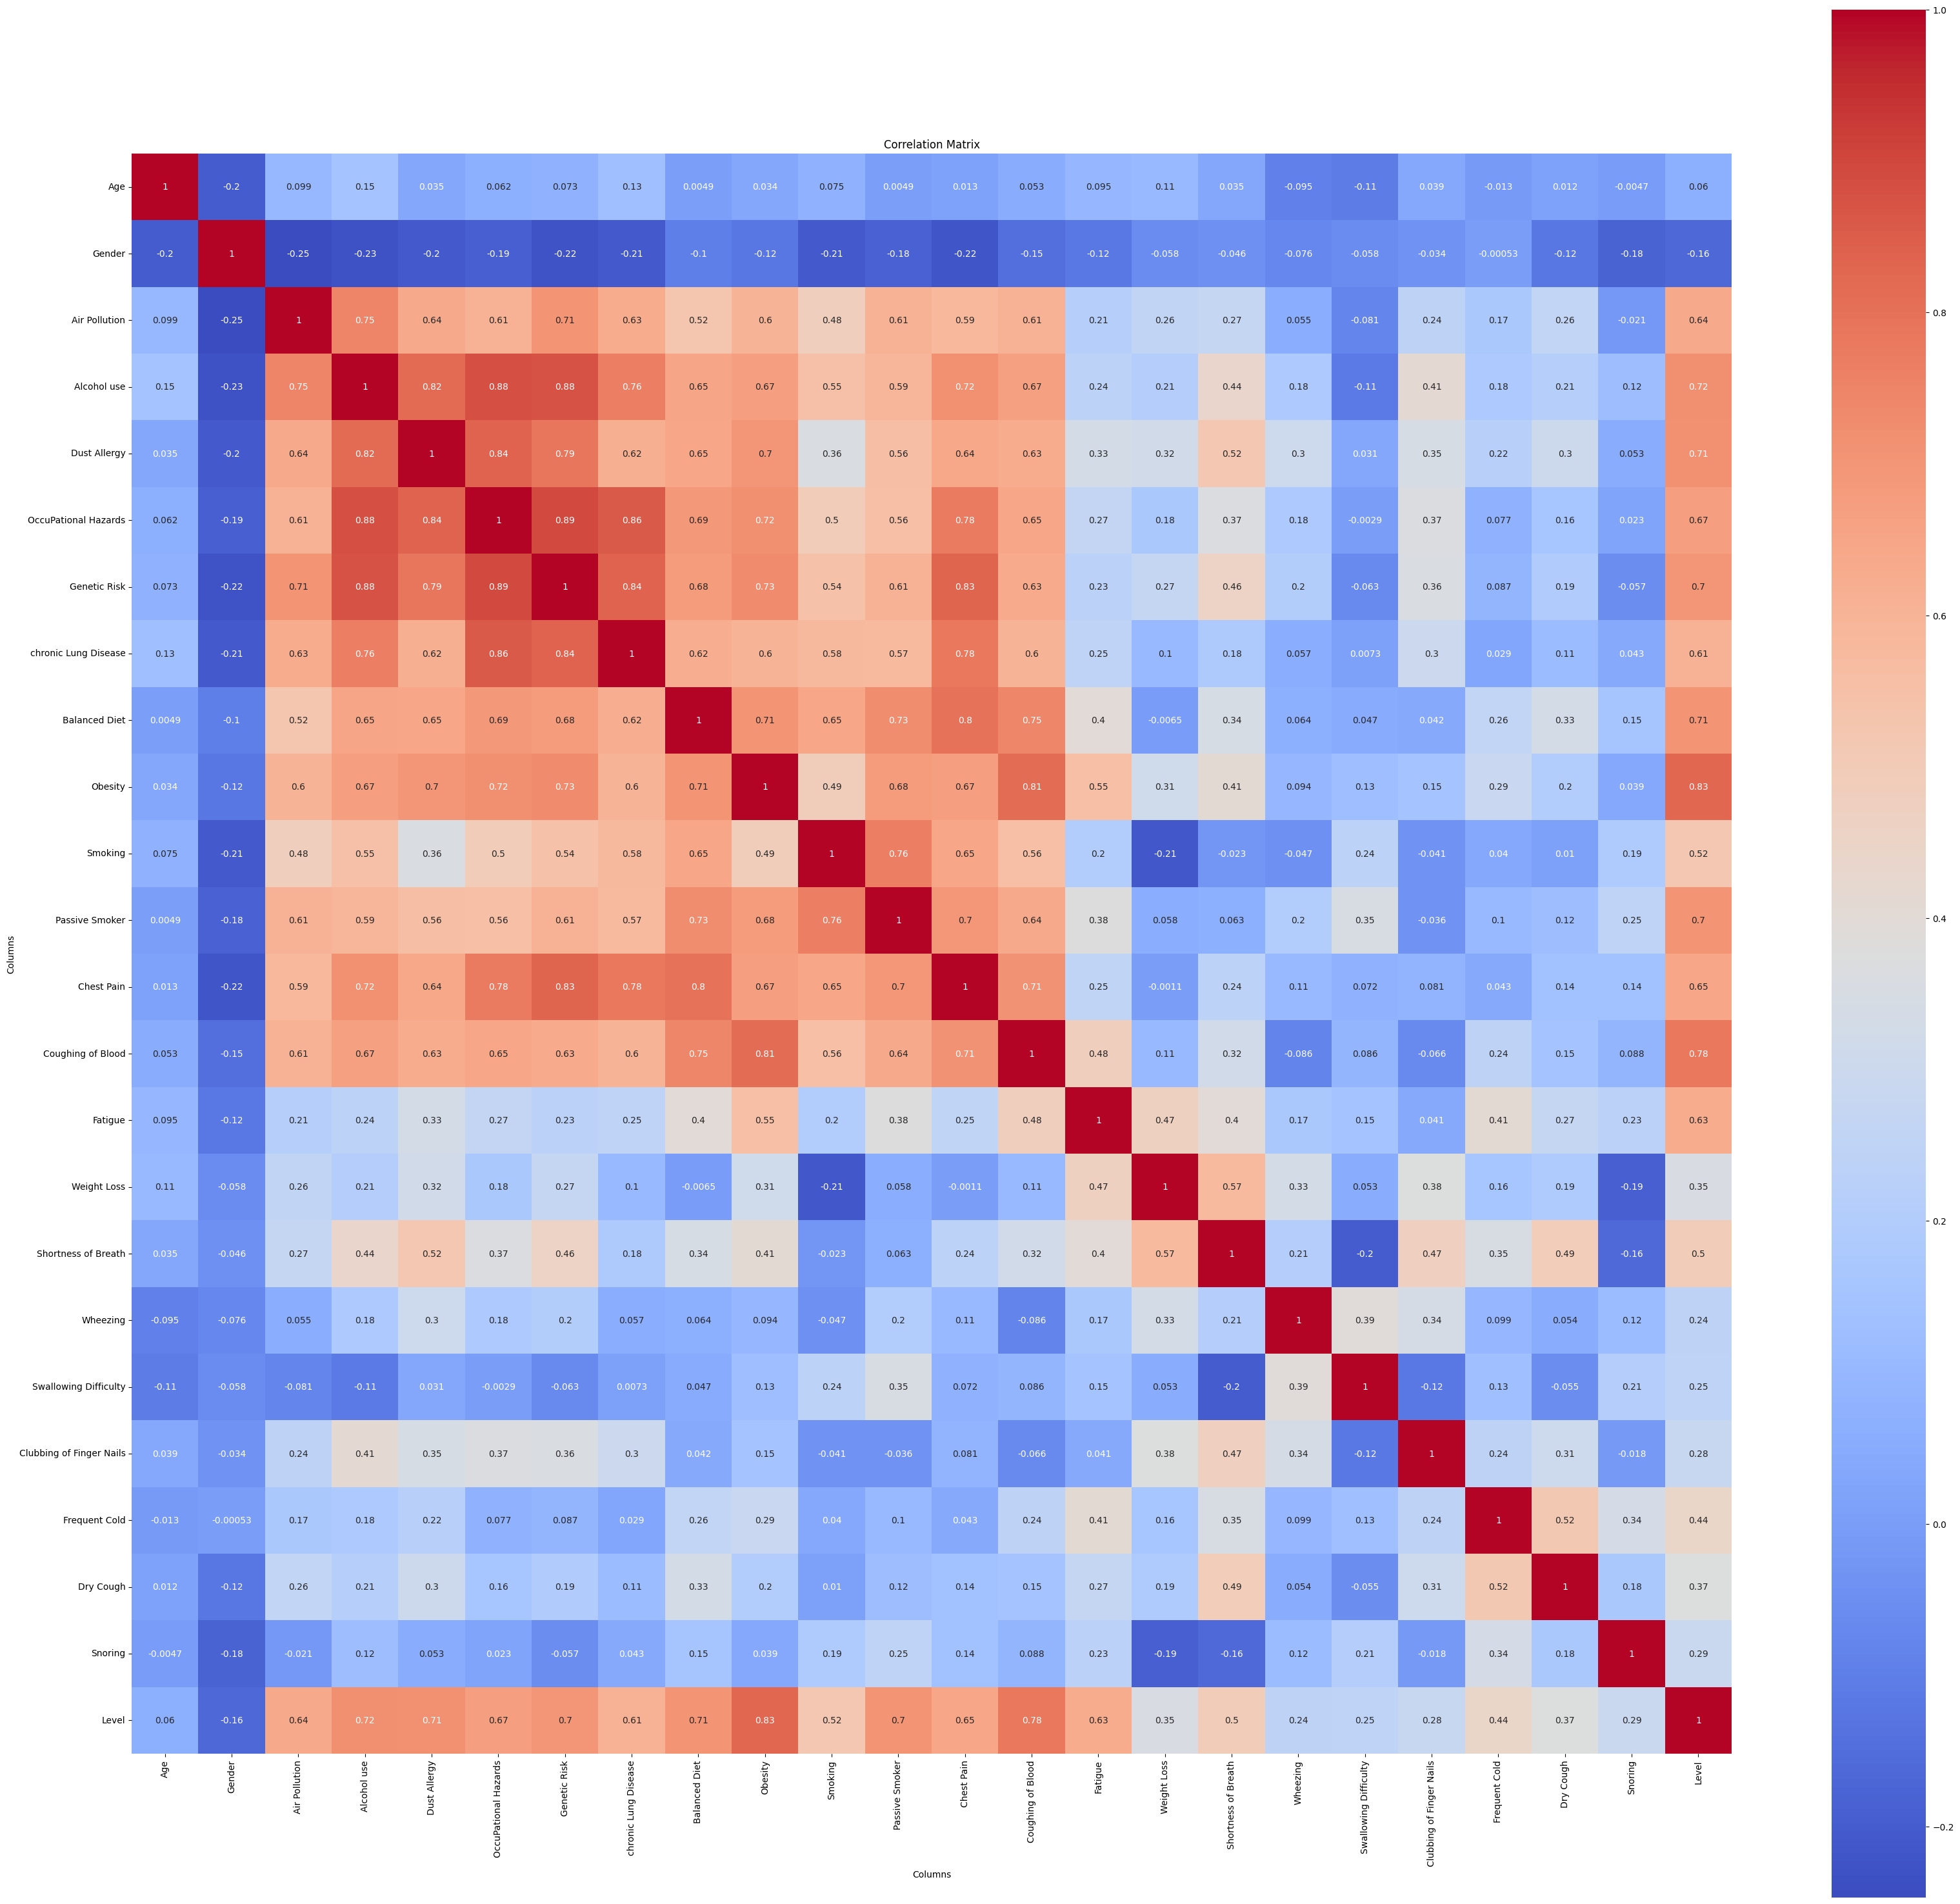

In [29]:
def get_corr(df_lung_cancer):
    correlation_matrix = df_lung_cancer.corr()

    # Create a heatmap using seaborn
    plt.figure(figsize=(40, 38))  # Set the figure size
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)

    # Set plot labels and title
    plt.title('Correlation Matrix')
    plt.xlabel('Columns')
    plt.ylabel('Columns')

    # Display the heatmap
    plt.show()
get_corr(df_lung_cancer)

### MLP Classifier (Neural Network)

MLP Classifier, which stands for Multi-layer Perceptron classifier, is a model which relies on an underlying neural network to perform classification tasks. These models are suitable for predicting a quantity given a set of inputs from a tabular dataset. The data goes into the input layer, there may be one or more hidden layers providing levels of abstraction, and predictions are made on the output layer, also called the visible layer.

In our case, the model takes in 26 features of input data such as chronic lung disease, genetic risk, and air pollution, and tries to accurately predict an individual’s level of lung cancer risk - low, medium, or high, denoted by the numbers 1, 2, and 3 respectively. It uses 2 hidden layers with 70 and 40 neurons each, and this creates 100% accuracy in testing.

The number of hidden layers and the amount of neurons in each affects the accuracy of the neural network model. The numbers 70 and 40 were a very lucky guess, but this won’t always be the case. Thus, we can utilize the function GridSearchCV to derive the most accurate parameters. The function loops through all possible combinations of the given parameters, which include hidden layer sizes, activation, and solver type. When this function was used, it provided the same accuracy!


In [30]:
import sklearn
from sklearn.model_selection import train_test_split
target=df_lung_cancer['Level']
input_columns = df_lung_cancer.loc[:, df_lung_cancer.columns != "Level"]
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2)

In [32]:
from sklearn.neural_network import MLPClassifier

In [33]:
MLP2=MLPClassifier()

parameter_space={
    "hidden_layer_sizes": [(i,i) for i in range(30,70)],
    "activation":["logistic","relu"],
    "solver":["adam"]

}

from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(MLP2,parameter_space,n_jobs=-1,verbose=2)

clf.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(30, 30), (31, 31), (32, 32),
                                                (33, 33), (34, 34), (35, 35),
                                                (36, 36), (37, 37), (38, 38),
                                                (39, 39), (40, 40), (41, 41),
                                                (42, 42), (43, 43), (44, 44),
                                                (45, 45), (46, 46), (47, 47),
                                                (48, 48), (49, 49), (50, 50),
                                                (51, 51), (52, 52), (53, 53),
                                                (54, 54), (55, 55), (56, 56),
                                                (57, 57), (58, 58), (59, 59), ...],
                         'solver': ['adam']},
             verbose=2)

In [34]:
y_hat=clf.predict(x_test)

In [35]:
total_squared_error = (np.sum((y_test - y_hat)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)

0.0


<Axes: >

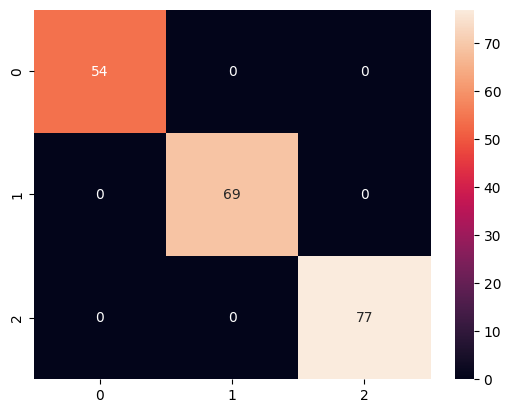

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

### Logistic Regression

Moving on to the next model, we put Logistic Regression into use. This model helps us predict and come to conclusions based on the user’s input. With that, it recognizes classification problems that may occur during the use of our product. In specific to our product, logistic regression helps tell the user what level of lung cancer they may be on. As the user lists their various symptoms, this logistic regression model helps us predict what level of lung cancer they may be on according to those symptoms.  

0.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



<Axes: >

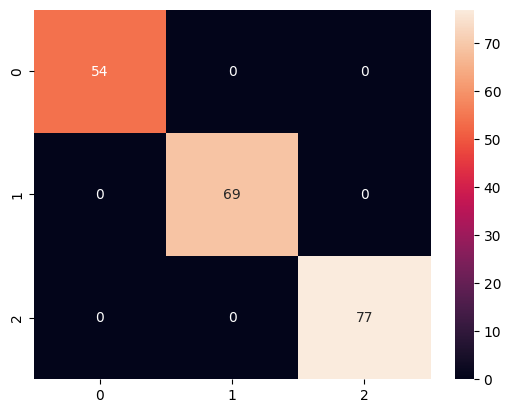

In [37]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train, y_train)

y_hat = clf.predict(x_test)

total_squared_error = (np.sum((y_test - y_hat)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)

from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

### K-Nearest-Neighbors

 I'm using a KNN model or a k nearest neighbors model. This model looks at the closest data points in a graph and makes an educated guess on the outcome. This type of model works well with 2d and 3d scatter plots. The more data that is inputted, messing with the amount of neighbors being observed, and having a closer correlation of data in the graph will increase the level of accuracy.

In [38]:
#gauges model
#its fully contained otherwise it dosnt work and gets 0% accuracy

#sets up the information needed for the model to work
url_lung = 'https://drive.google.com/uc?id=1fC8ZQrrfXUPyuW6dR4992SzVAROcEjQf'
gdown.download(url_lung, 'lung_cancer_data.csv', quiet=False)
from sklearn.linear_model import LinearRegression
import math
df_lung_cancer = pd.read_csv('/content/lung_cancer_data.csv')
columns_to_drop = ['index', 'Patient Id']
df_lung_cancer.drop(columns_to_drop, axis=1, inplace=True)
df_lung_cancer.dropna(inplace = True)
df_lung_cancer.drop_duplicates(inplace = True)
df_lung_cancer = df_lung_cancer.reset_index(drop=True)
length = len(df_lung_cancer.index)
df_lung_cancer = df_lung_cancer.sample(frac=1, random_state=42)

#creates the lists
Age_list = df_lung_cancer['Age'].tolist()
Gender_list = df_lung_cancer['Gender'].tolist()
AP_list = df_lung_cancer['Air Pollution'].tolist()
AU_list = df_lung_cancer['Alcohol use'].tolist()
DA_list = df_lung_cancer['Dust Allergy'].tolist()
OH_list = df_lung_cancer['OccuPational Hazards'].tolist()
GR_list = df_lung_cancer['Genetic Risk'].tolist()
CLD_list = df_lung_cancer['chronic Lung Disease'].tolist()
BD_list = df_lung_cancer['Balanced Diet'].tolist()
Obesity_list = df_lung_cancer['Obesity'].tolist()
Smoking_list = df_lung_cancer['Smoking'].tolist()
PS_list = df_lung_cancer['Passive Smoker'].tolist()
CP_list = df_lung_cancer['Chest Pain'].tolist()
COB_list = df_lung_cancer['Coughing of Blood'].tolist()
Fatigue_list = df_lung_cancer['Fatigue'].tolist()
WL_list = df_lung_cancer['Weight Loss'].tolist()
SOB_list = df_lung_cancer['Shortness of Breath'].tolist()
Wheezing_list = df_lung_cancer['Wheezing'].tolist()
SD_list = df_lung_cancer['Swallowing Difficulty'].tolist()
CFN_list = df_lung_cancer['Clubbing of Finger Nails'].tolist()
FC_list = df_lung_cancer['Frequent Cold'].tolist()
DC_list = df_lung_cancer['Dry Cough'].tolist()
Snoring_list = df_lung_cancer['Snoring'].tolist()
Level_list = df_lung_cancer['Level'].tolist()

#splits the list into its testing data
Age_list_t = Age_list[114:]
Gender_list_t = Gender_list[114:]
AP_list_t = AP_list[114:]
AU_list_t = AU_list[114:]
DA_list_t = DA_list[114:]
OH_list_t = OH_list[114:]
GR_list_t = GR_list[114:]
CLD_list_t = CLD_list[114:]
BD_list_t = BD_list[114:]
Obesity_list_t = Obesity_list[114:]
Smoking_list_t = Smoking_list[114:]
PS_list_t = PS_list[114:]
CP_list_t = CP_list[114:]
COB_list_t = COB_list[114:]
Fatigue_list_t = Fatigue_list[114:]
WL_list_t = WL_list[114:]
SOB_list_t =  SOB_list[114:]
Wheezing_list_t = Wheezing_list[114:]
SD_list_t = SD_list[114:]
CFN_list_t = CFN_list[114:]
FC_list_t = FC_list[114:]
DC_list_t = DC_list[114:]
Snoring_list_t =  Snoring_list[114:]
Level_list_t = Level_list[114:]

#splits the list into its training data
Age_list = Age_list[:114]
Gender_list = Gender_list[:114]
AP_list = AP_list[:114]
AU_list = AU_list[:114]
DA_list = DA_list[:114]
OH_list = OH_list[:114]
GR_list = GR_list[:114]
CLD_list = CLD_list[:114]
BD_list = BD_list[:114]
Obesity_list = Obesity_list[:114]
Smoking_list = Smoking_list[:114]
PS_list = PS_list[:114]
CP_list = CP_list[:114]
COB_list = COB_list[:114]
Fatigue_list = Fatigue_list[:114]
WL_list = WL_list[:114]
SOB_list =  SOB_list[:114]
Wheezing_list = Wheezing_list[:114]
SD_list = SD_list[:114]
CFN_list = CFN_list[:114]
FC_list = FC_list[:114]
DC_list = DC_list[:114]
Snoring_list =  Snoring_list[:114]
Level_list = Level_list[:114]

#gets the distance of the nearest points
def dist(a1, b1, c1, d1, e1, f1, g1, h1, i1, j1, k1, l1, m1, n1, o1, p1, q1, r1 ,s1 ,t1 ,u1 ,v1 ,w1 ,a2 ,b2 ,c2 ,d2 ,e2, f2, g2, h2, i2, j2, k2, l2, m2, n2, o2, p2, q2, r2, s2, t2, u2, v2, w2):
    return math.sqrt((a1 - a2)**2 + (b1 - b2)**2 + (c1 - c2)**2+ (d1 - d2)**2+ (e1 - e2)**2+ (f1 - f2)**2+ (g1 - g2)**2+ (h1 - h2)**2+ (i1 - i2)**2+ (j1 - j2)**2+ (k1 - k2)**2+ (l1 - l2)**2+ (m1 - m2)**2+ (n1 - n2)**2+ (o1 - o2)**2+ (p1 - p2)**2+ (q1 - q2)**2+ (r1 - r2)**2+ (s1 - s2)**2+ (t1 - t2)**2+ (u1 - u2)**2+ (v1 - v2)**2+ (w1 - w2)**2)

#uses the info in the data set and the closest data points to predict the level of lung cancer
def find_level(Age, Gender, AP, AU, DA, OH, GR, CLD, BD, Obesity, Smoking, PS, CP, COB, Fatigue, WL, SOB, Wheezing, SD, CFN, FC, DC, Snoring):
  point_list = []
  #gets the point info for all the points starting including their distance from the inputed datapoint
  for i in range(0, len(Obesity_list)):

      distance = dist(Age, Gender, AP, AU, DA, OH, GR, CLD, BD, Obesity, Smoking, PS, CP, COB, Fatigue, WL, SOB, Wheezing, SD, CFN, FC, DC, Snoring, Age_list[i], Gender_list[i], AP_list[i], AU_list[i], DA_list[i], OH_list[i], GR_list[i], CLD_list[i], BD_list[i], Obesity_list[i], Smoking_list[i], PS_list[i], CP_list[i], COB_list[i], Fatigue_list[i], WL_list[i], SOB_list[i], Wheezing_list[i], SD_list[i], CFN_list[i], FC_list[i], DC_list[i], Snoring_list[i])
      point_list.append((distance, Age_list[i], Gender_list[i], AP_list[i], AU_list[i], DA_list[i], OH_list[i], GR_list[i], CLD_list[i], BD_list[i], Obesity_list[i], Smoking_list[i], PS_list[i], CP_list[i], COB_list[i], Fatigue_list[i], WL_list[i], SOB_list[i], Wheezing_list[i], SD_list[i], CFN_list[i], FC_list[i], DC_list[i], Snoring_list[i], Level_list[i]))

  point_list = sorted(point_list)

  Low_risk = 0
  Medium_risk  = 0
  High_risk  = 0
  #finds the 7 closest points and arranges them by risk
  for i in range(0, 7):
      if point_list[i][24] == 'Low':
          Low_risk  += 1
      if point_list[i][24] == 'Medium':
            Medium_risk += 1
      if point_list[i][24] == 'High':
            High_risk += 1

  #comes to a conclusion on the risk using the amount of low, medium and high points that were chosen
  if Low_risk >= Medium_risk and Low_risk >= High_risk:
      return 'Low'
  elif Medium_risk >= Low_risk and Medium_risk>= High_risk:
      return 'Medium'
  else:
      return 'High'

#returns a responce from the interface given the information
def greet(name, Age, Gender, Air_Pollution, Alcohol_use, Dust_Allergy, OccuPational_Hazards, Genetic_Risk, chronic_Lung_Disease, Balanced_Diet, Obesity, Smoking, Passive_Smoker, Chest_Pain, Coughing_of_Blood, Fatigue, Weight_Loss, Shortness_of_Breath, Wheezing, Swallowing_Difficulty, Clubbing_of_Finger_Nails, Frequent_Cold, Dry_Cough, Snoring, accuracy):
    right = 0
    wrong = 0
    i = 0
    #finds the accuracy using the test data
    for item in Level_list_t:
      risk_level = find_level(Age_list_t[i], Gender_list_t[i], AP_list_t[i], AU_list_t[i], DA_list_t[i], OH_list_t[i], GR_list_t[i], CLD_list_t[i], BD_list_t[i], Obesity_list_t[i], Smoking_list_t[i], PS_list_t[i], CP_list_t[i], COB_list_t[i], Fatigue_list_t[i], WL_list_t[i], SOB_list_t[i], Wheezing_list_t[i], SD_list_t[i], CFN_list_t[i], FC_list_t[i], DC_list_t[i], Snoring_list_t[i])
      if risk_level == Level_list_t[i]:
        right = right + 1
      else:
        wrong = wrong + 1
      i = i+1
    accuracy = round((right/i)*100)
    #converts the string value of gender into a variable
    if Gender == "M":
      gen = 1
    else:
      gen = 2
    #uses theuser inputted info to find the predicted level of cancer
    level = find_level(Age, gen, Air_Pollution, Alcohol_use, Dust_Allergy, OccuPational_Hazards, Genetic_Risk, chronic_Lung_Disease, Balanced_Diet, Obesity, Smoking, Passive_Smoker, Chest_Pain, Coughing_of_Blood, Fatigue, Weight_Loss, Shortness_of_Breath, Wheezing, Swallowing_Difficulty, Clubbing_of_Finger_Nails, Frequent_Cold, Dry_Cough, Snoring)

    #shows th user what the prediction is and displays the accuracy of the ai at its current state
    greeting = f"hello {name} your predicted cancer level is {level}."
    accuracy_rating = f"the current accuracy is {accuracy}%."
    return greeting, accuracy_rating

#creates the interface and inputs the values into the greet function above
demo = gr.Interface(
    fn=greet,
    inputs=["text", gr.Slider(0, 110), gr.Dropdown("MF"), gr.Slider(1, 10), gr.Slider(1, 10), gr.Slider(1, 10), gr.Slider(1, 10), gr.Slider(1, 10), gr.Slider(1, 10), gr.Slider(1, 10), gr.Slider(1, 10), gr.Slider(1, 10), gr.Slider(1, 10), gr.Slider(1, 10), gr.Slider(1, 10), gr.Slider(1, 10), gr.Slider(1, 10), gr.Slider(1, 10), gr.Slider(1, 10), gr.Slider(1, 10), gr.Slider(1, 10), gr.Slider(1, 10), gr.Slider(1, 10), gr.Slider(1, 10)],
    outputs=["text", "text"],
)
demo.launch()

Downloading...
From: https://drive.google.com/uc?id=1fC8ZQrrfXUPyuW6dR4992SzVAROcEjQf
To: /content/lung_cancer_data.csv
100%|██████████| 61.5k/61.5k [00:00<00:00, 36.7MB/s]
/usr/local/lib/python3.10/dist-packages/gradio/utils.py:1017: UserWarning:

Expected 25 arguments for function <function greet at 0x7d7746c0e4d0>, received 24.

/usr/local/lib/python3.10/dist-packages/gradio/utils.py:1021: UserWarning:

Expected at least 25 arguments for function <function greet at 0x7d7746c0e4d0>, received 24.



Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e60f4b5ecd2fb29435.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [39]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(x_train, y_train)



model = SelectFromModel(lsvc, prefit=True)

model.feature_names_in_ = df_lung_cancer.columns[0:23]

chosen_features = model.get_support()

feature_names = model.feature_names_in_

selected_features = [feature_names[i] for i, chosen in enumerate(chosen_features) if chosen]

print(len(selected_features))
selected_features

7


['Age',
 'Alcohol use',
 'Obesity',
 'Smoking',
 'Passive Smoker',
 'Coughing of Blood',
 'Fatigue']

In [40]:
df_lung_cancer.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [41]:
columns_to_drop = ['Gender', 'Air Pollution', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Chest Pain', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring']

df_lung_cancer.drop(columns_to_drop, axis=1, inplace=True)



In [42]:
target=df_lung_cancer['Level']
input_columns = df_lung_cancer.loc[:, df_lung_cancer.columns != "Level"]
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2)

In [44]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(hidden_layer_sizes = (70, 40,), activation="logistic", solver="adam")

MLP.fit(x_train, y_train)

y_hat = MLP.predict(x_test)

total_squared_error = (np.sum((y_test - y_hat)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)


from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



TypeError: unsupported operand type(s) for -: 'str' and 'str'